# Reading and Understanding data

In [595]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [596]:
#Importing dataset
carprice_df = pd.read_csv('CarPrice_Assignment.csv')
carprice_df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


### Visualizing numerical variables

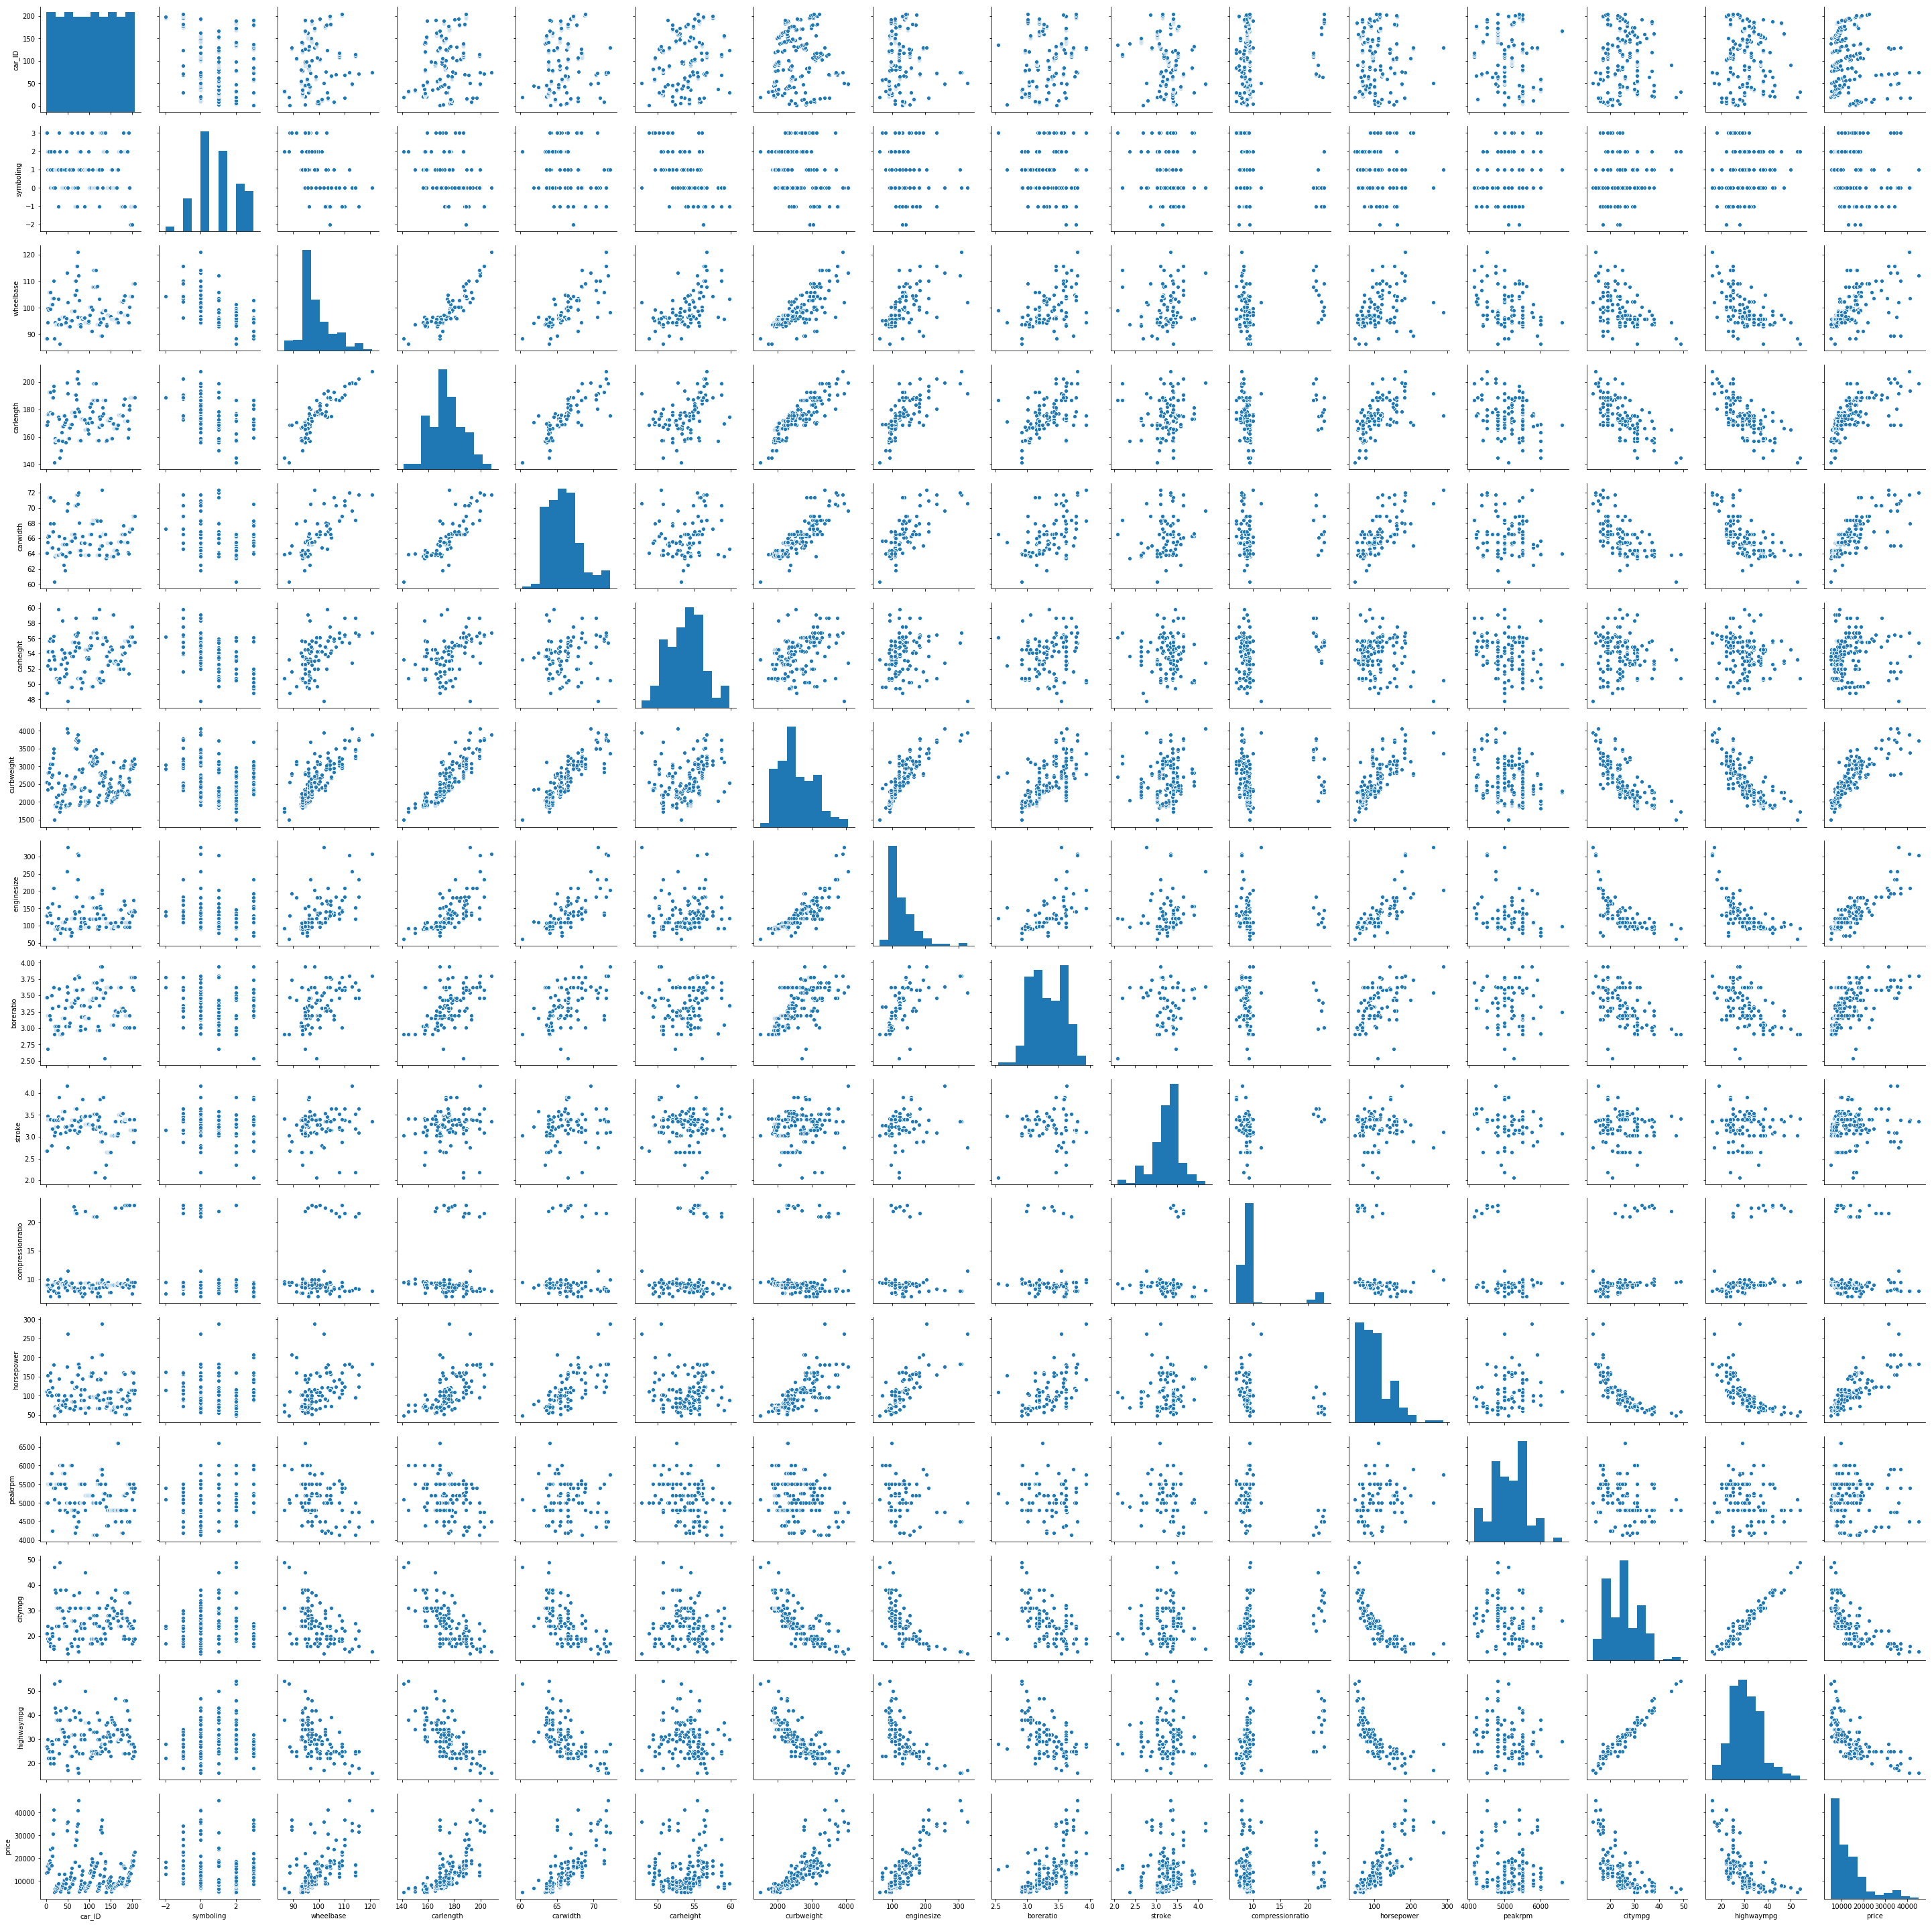

In [597]:
#Visualizing numerical variables
sns.pairplot(carprice_df)
plt.show()


### Variables which have linear relationship with 'price' are wheelbase, curbweight, carlength, carwidth, enginesize , horsepower


### Visualizing categorical variables

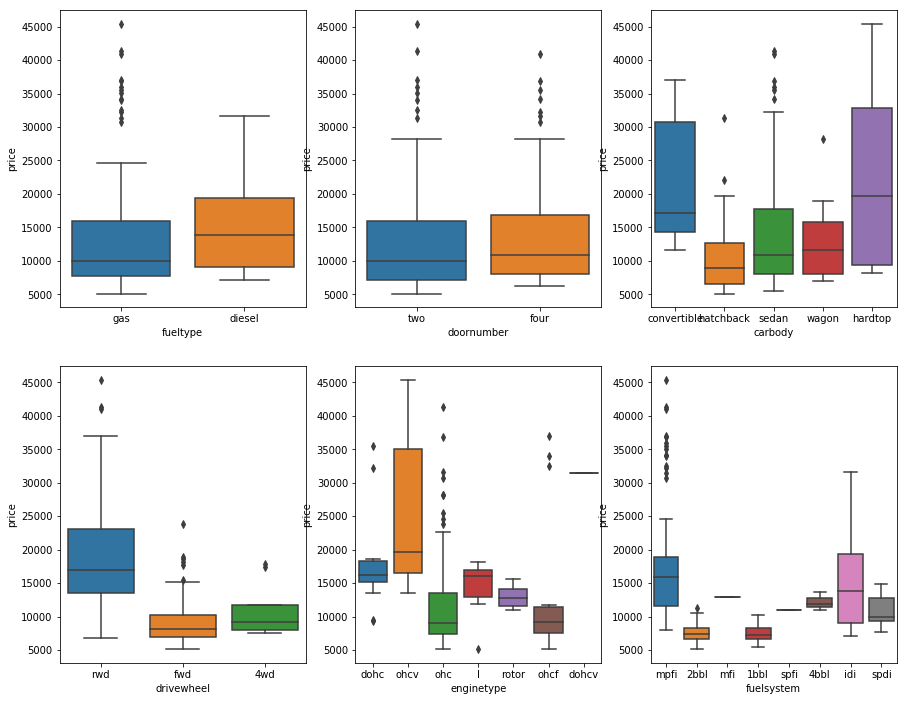

In [598]:
#Visualizing categorical variables
plt.figure(figsize=(15,12))
plt.subplot(2,3,1)
sns.boxplot(x='fueltype',y='price', data=carprice_df)
#From below boxplot , its clear that fueltype affects price
plt.subplot(2,3,2)
sns.boxplot(x='doornumber',y='price', data=carprice_df)
#From below boxplot , its clear that doornumber doesnt have any effect on price
plt.subplot(2,3,3)
sns.boxplot(x='carbody',y='price', data=carprice_df)
#From below boxplot , its clear that carbody has some effect on price
plt.subplot(2,3,4)
sns.boxplot(x='drivewheel',y='price', data=carprice_df)
#From below boxplot , its clear that drivewheel has some effect on price
plt.subplot(2,3,5)
sns.boxplot(x='enginetype',y='price', data=carprice_df)
#From below boxplot , its clear that enginetype has some effect on price
plt.subplot(2,3,6)
sns.boxplot(x='fuelsystem',y='price', data=carprice_df)
#From below boxplot , its clear that fuelsystem has some effect on price


### Overall the categorical variables that are significant : fueltype , carbody, drivewheel, enginetype

Selecting the variables for modelling based on above plots
Numerical - wheelbase, curbweight, carlength, carwidth, enginesize , horsepower
Categorical - fueltype , carbody, drivewheel, enginetype

In [599]:
carprice_chosen_df = carprice_df

# Data Preperation for Modelling

In [600]:
#Separating Company name from CarName column
carprice_chosen_df['CompanyName'] = carprice_chosen_df['CarName'].apply(lambda x : x.lower().split(' ')[0])

In [601]:
#Replacing mis-spelled values using a dict
misspelled_dict = {'toyouta':'toyota','vokswagen':'volkswagen','vw':'volkswagen','porcshce':'porsche','maxda':'mazda'}
carprice_chosen_df['CompanyName'].replace(misspelled_dict,inplace=True)

In [602]:
#Dropping column CarName as company name is extracted
carprice_chosen_df = carprice_chosen_df.drop('CarName', axis=1)
carprice_chosen_df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [603]:
#Convert binary variables to 1/0
# Convert fueltype - gas-0, disel-1
carprice_chosen_df['fueltype'] = carprice_chosen_df['fueltype'].map({'gas':0,'diesel':1})
carprice_chosen_df['aspiration'] = carprice_chosen_df['aspiration'].map({'std':0,'turbo':1})
carprice_chosen_df['doornumber'] = carprice_chosen_df['doornumber'].map({'two':0,'four':1})
carprice_chosen_df['enginelocation'] = carprice_chosen_df['enginelocation'].map({'front':0,'rear':1})


In [604]:
# Create dummay variables for carbody
carbody_dummy = pd.get_dummies(carprice_chosen_df['carbody'],drop_first=True)
#concat with original frame
carprice_chosen_df = pd.concat([carprice_chosen_df,carbody_dummy], axis=1)
carprice_chosen_df = carprice_chosen_df.drop('carbody',axis=1)

In [605]:
# Create dummay variables for drivewheel
drivewheel_dummy = pd.get_dummies(carprice_chosen_df['drivewheel'],drop_first=True)
#concat with original frame
carprice_chosen_df = pd.concat([carprice_chosen_df,drivewheel_dummy], axis=1)
carprice_chosen_df = carprice_chosen_df.drop('drivewheel',axis=1)

In [606]:
# Create dummay variables for enginetype
enginetype_dummy = pd.get_dummies(carprice_chosen_df['enginetype'],drop_first=True)
#concat with original frame
carprice_chosen_df = pd.concat([carprice_chosen_df,enginetype_dummy], axis=1)
carprice_chosen_df = carprice_chosen_df.drop('enginetype',axis=1)

In [607]:
# Create dummay variables for CompanyName
CompanyName_dummy = pd.get_dummies(carprice_chosen_df['CompanyName'],drop_first=True)
#concat with original frame
carprice_chosen_df = pd.concat([carprice_chosen_df,CompanyName_dummy], axis=1)
carprice_chosen_df = carprice_chosen_df.drop('CompanyName',axis=1)

In [608]:
#Create dummay variables for doornumber
doornumber_dummy = pd.get_dummies(carprice_chosen_df['doornumber'],drop_first=True)
#concat with original frame
carprice_chosen_df = pd.concat([carprice_chosen_df,doornumber_dummy], axis=1)
carprice_chosen_df = carprice_chosen_df.drop('doornumber',axis=1)

In [609]:
#Create dummay variables for fuelsystem
fuelsystem_dummy = pd.get_dummies(carprice_chosen_df['fuelsystem'],drop_first=True)
#concat with original frame
carprice_chosen_df = pd.concat([carprice_chosen_df,fuelsystem_dummy], axis=1)
carprice_chosen_df = carprice_chosen_df.drop('fuelsystem',axis=1)

In [610]:
#Create dummay variables for cylindernumber
cylindernumber_dummy = pd.get_dummies(carprice_chosen_df['cylindernumber'],drop_first=True)
#concat with original frame
carprice_chosen_df = pd.concat([carprice_chosen_df,cylindernumber_dummy], axis=1)
carprice_chosen_df = carprice_chosen_df.drop('cylindernumber',axis=1)

In [611]:
carprice_chosen_df.head()

,car_ID,symboling,fueltype,aspiration,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,mfi,mpfi,spdi,spfi,five,four,six,three,twelve,two
0,1,3,0,0,0,88.6,168.8,64.1,48.8,2548,...,0,1,0,0,0,1,0,0,0,0
1,2,3,0,0,0,88.6,168.8,64.1,48.8,2548,...,0,1,0,0,0,1,0,0,0,0
2,3,1,0,0,0,94.5,171.2,65.5,52.4,2823,...,0,1,0,0,0,0,1,0,0,0
3,4,2,0,0,0,99.8,176.6,66.2,54.3,2337,...,0,1,0,0,0,1,0,0,0,0
4,5,2,0,0,0,99.4,176.6,66.4,54.3,2824,...,0,1,0,0,1,0,0,0,0,0


In [612]:
carprice_chosen_df.columns

Index([          'car_ID',        'symboling',         'fueltype',
             'aspiration',   'enginelocation',        'wheelbase',
              'carlength',         'carwidth',        'carheight',
             'curbweight',       'enginesize',        'boreratio',
                 'stroke', 'compressionratio',       'horsepower',
                'peakrpm',          'citympg',       'highwaympg',
                  'price',          'hardtop',        'hatchback',
                  'sedan',            'wagon',              'fwd',
                    'rwd',            'dohcv',                'l',
                    'ohc',             'ohcf',             'ohcv',
                  'rotor',             'audi',              'bmw',
                  'buick',        'chevrolet',            'dodge',
                  'honda',            'isuzu',           'jaguar',
                  'mazda',          'mercury',       'mitsubishi',
                 'nissan',          'peugeot',         'plymou

## Split data into train,test 

In [613]:
carprice_train_df, carprice_test_df = train_test_split(carprice_chosen_df, train_size=0.7, random_state=100) 
print(carprice_train_df.shape)
print(carprice_test_df.shape)
carprice_chosen_df.columns

(143, 66)
(62, 66)


Index([          'car_ID',        'symboling',         'fueltype',
             'aspiration',   'enginelocation',        'wheelbase',
              'carlength',         'carwidth',        'carheight',
             'curbweight',       'enginesize',        'boreratio',
                 'stroke', 'compressionratio',       'horsepower',
                'peakrpm',          'citympg',       'highwaympg',
                  'price',          'hardtop',        'hatchback',
                  'sedan',            'wagon',              'fwd',
                    'rwd',            'dohcv',                'l',
                    'ohc',             'ohcf',             'ohcv',
                  'rotor',             'audi',              'bmw',
                  'buick',        'chevrolet',            'dodge',
                  'honda',            'isuzu',           'jaguar',
                  'mazda',          'mercury',       'mitsubishi',
                 'nissan',          'peugeot',         'plymou

In [614]:
carprice_chosen_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 66 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
fueltype            205 non-null int64
aspiration          205 non-null int64
enginelocation      205 non-null int64
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginesize          205 non-null int64
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg          205 non-null int64
price               205 non-null float64
hardtop             205 non-null uint8
hatchback           205 non-null uint8
sedan               205 non-null uint8
wagon               2

In [615]:
carprice_chosen_df['cylindernumber'].value_counts()

KeyError: 'cylindernumber'

## Scaling  Variables


In [616]:
#wheelbase - MinMaxScaler scaling
#enginesize - MinMaxScaler scaling
#horsepower - MinMaxScaler scaling
carprice_chosen_df.head(5)
scaler = MinMaxScaler()
#variables_rescale = ['wheelbase','curbweight','carlength','carwidth','enginesize','horsepower','price']
variables_rescale = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']
carprice_train_df[variables_rescale] = scaler.fit_transform(carprice_train_df[variables_rescale])
carprice_train_df.head()
carprice_test_df[variables_rescale] = scaler.fit_transform(carprice_test_df[variables_rescale])
carprice_test_df.head()

,car_ID,symboling,fueltype,aspiration,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,mfi,mpfi,spdi,spfi,five,four,six,three,twelve,two
160,161,0,0,0,0,0.265306,0.341732,0.200000,0.346154,0.132148,...,0,0,0,0,0,1,0,0,0,0
186,187,2,0,0,0,0.311953,0.426772,0.315789,0.605769,0.219125,...,0,1,0,0,0,1,0,0,0,0
59,60,1,0,0,0,0.355685,0.522835,0.421053,0.413462,0.271985,...,0,0,0,0,0,1,0,0,0,0
165,166,1,0,0,0,0.230321,0.379528,0.157895,0.307692,0.214320,...,0,1,0,0,0,1,0,0,0,0
140,141,2,0,0,0,0.195335,0.200000,0.136842,0.605769,0.202307,...,0,0,0,0,0,1,0,0,0,0


In [617]:
#Creating X,y train series for modelling 
y_train = carprice_train_df.pop('price')
X_train = carprice_train_df
y_test = carprice_test_df.pop('price')
X_test = carprice_test_df
X_train.head()

,car_ID,symboling,fueltype,aspiration,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,mfi,mpfi,spdi,spfi,five,four,six,three,twelve,two
122,123,1,0,0,0,0.244828,0.426016,0.291667,0.265487,0.272692,...,0,0,0,0,0,1,0,0,0,0
125,126,3,0,0,0,0.272414,0.452033,0.666667,0.212389,0.500388,...,0,1,0,0,0,1,0,0,0,0
166,167,1,0,0,0,0.272414,0.448780,0.308333,0.424779,0.314973,...,0,1,0,0,0,1,0,0,0,0
1,2,3,0,0,0,0.068966,0.450407,0.316667,0.088496,0.411171,...,0,1,0,0,0,1,0,0,0,0
199,200,-1,0,1,0,0.610345,0.775610,0.575000,0.858407,0.647401,...,0,1,0,0,0,1,0,0,0,0


## Feature Selection using RFE

In [618]:
#importing RFE related libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [619]:
#Running RFE with required variables number = 10
lmrfe = LinearRegression()

le = LabelEncoder()
for column_name in X_train.columns:
    if X_train[column_name].dtype == object:
        X_train[column_name] = le.fit_transform(X_train[column_name])
    else:
        pass
    
lmrfe.fit(X_train,y_train)
rfe = RFE(lmrfe,10)
rfe = rfe.fit(X_train,y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('car_ID', False, 51),
 ('symboling', False, 53),
 ('fueltype', False, 25),
 ('aspiration', False, 14),
 ('enginelocation', True, 1),
 ('wheelbase', False, 17),
 ('carlength', False, 21),
 ('carwidth', True, 1),
 ('carheight', False, 18),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', False, 2),
 ('compressionratio', False, 26),
 ('horsepower', False, 15),
 ('peakrpm', False, 16),
 ('citympg', False, 39),
 ('highwaympg', False, 29),
 ('hardtop', False, 31),
 ('hatchback', False, 30),
 ('sedan', False, 32),
 ('wagon', False, 33),
 ('fwd', False, 52),
 ('rwd', False, 41),
 ('dohcv', False, 12),
 ('l', False, 7),
 ('ohc', False, 50),
 ('ohcf', False, 10),
 ('ohcv', False, 40),
 ('rotor', True, 1),
 ('audi', False, 37),
 ('bmw', True, 1),
 ('buick', False, 38),
 ('chevrolet', False, 23),
 ('dodge', False, 20),
 ('honda', False, 22),
 ('isuzu', False, 48),
 ('jaguar', False, 28),
 ('mazda', False, 44),
 ('mercury', False, 54),
 ('mitsubishi', False

In [621]:
selected_columns = X_train.columns[rfe.support_]
selected_columns

Index(['enginelocation', 'carwidth', 'curbweight', 'enginesize', 'boreratio',
       'rotor', 'bmw', 'porsche', 'three', 'twelve'],
      dtype='object')

## Selected variables from RFE : 'enginelocation', 'carwidth', 'curbweight', 'enginesize', 'boreratio','rotor', 'bmw', 'porsche', 'three', 'twelve'

## Training the model

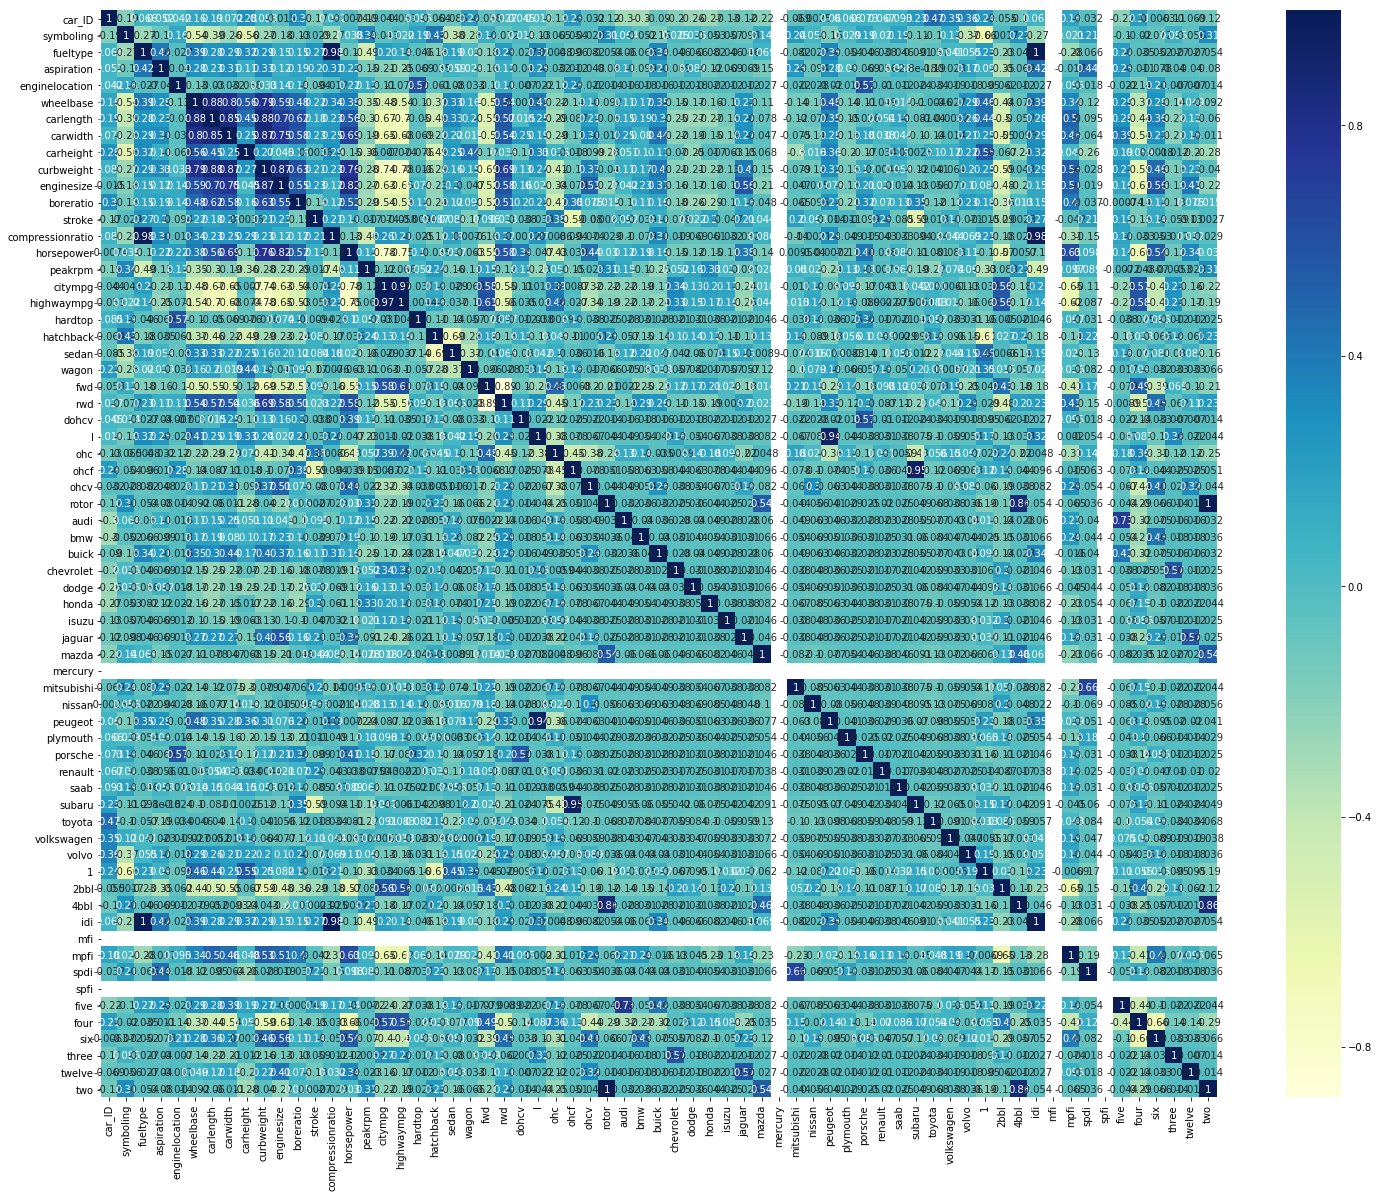

In [622]:
#Heatmap to check correlation
plt.figure(figsize=(25,20))
sns.heatmap(carprice_train_df.corr(), annot =True, cmap='YlGnBu')
plt.show()

### Selecting all vriables with significant effect and eliminating one by one  

In [623]:
# Fit model with all variables selected by RFE
var_chosen = ['enginelocation', 'carwidth', 'curbweight', 'enginesize', 'boreratio','rotor', 'bmw', 'porsche', 'three', 'twelve']
X_train_sm = sm.add_constant(X_train[var_chosen])

#Creating first model
lr = sm.OLS(y_train,X_train_sm)
lr_s = lr.fit()
lr_s.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     137.1
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.21e-64
Time:                        12:28:58   Log-Likelihood:                 190.87
No. Observations:                 143   AIC:                            -359.7
Df Residuals:                     132   BIC:                            -327.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1594      0.019     -8.597      0.000      -0.196      -0.123
enginelocation     0.3298      0.086      3.844      0.000       0.160       0.500
carwidth           0.3283      0.067      4.910      0.000       0.196       0.461
curbweight         0.2989      0.080      3.729      0.000       0.140       0.457
enginesize         0.5732      0.097      5.926      0.000       0.382       0.764
boreratio         -0.1088      0.037     -2.976      0.003      -0.181      -0.036
rotor              0.1542      0.037      4.123      0.000       0.080       0.228
bmw                0.2453      0.029      8.327      0.000       0.187       0.304
porsche            0.1565      0.052      3.000      0.003       0.053       0.260
three              0.1802      0.068      2.638      0.009       0.045       0.315
twelve            -0.0536      0.081     -0.659      0.511      -0.214       0.107
==============================================================================
Omnibus:                       10.995   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               15.683
Skew:                           0.423   Prob(JB):                     0.000393
Kurtosis:                       4.385   Cond. No.                         30.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [624]:
#Checking VIF
vif = pd.DataFrame()
vif['Features'] = var_chosen
vif['VIF'] = [variance_inflation_factor(X_train[var_chosen].values, i) for i in range(X_train[var_chosen].shape[1])]
vif['VIF'] = round(vif['VIF'] ,2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
2,curbweight,41.06
1,carwidth,25.19
3,enginesize,24.95
4,boreratio,9.78
7,porsche,1.67
0,enginelocation,1.61
9,twelve,1.50
5,rotor,1.27
6,bmw,1.18
8,three,1.01


In [625]:
#Removed cylender_twelve based on high p-value
var_chosen = ['enginelocation', 'carwidth', 'curbweight', 'enginesize', 'boreratio','rotor', 'bmw', 'porsche', 'three']


X_train_sm = sm.add_constant(X_train[var_chosen])

#Creating first model
lr = sm.OLS(y_train,X_train_sm)
lr_s = lr.fit()
lr_s.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     152.9
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.18e-65
Time:                        12:30:11   Log-Likelihood:                 190.63
No. Observations:                 143   AIC:                            -361.3
Df Residuals:                     133   BIC:                            -331.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1587      0.018     -8.591      0.000      -0.195      -0.122
enginelocation     0.3348      0.085      3.925      0.000       0.166       0.503
carwidth           0.3303      0.067      4.954      0.000       0.198       0.462
curbweight         0.3126      0.077      4.048      0.000       0.160       0.465
enginesize         0.5389      0.081      6.625      0.000       0.378       0.700
boreratio         -0.1075      0.036     -2.952      0.004      -0.180      -0.035
rotor              0.1485      0.036      4.089      0.000       0.077       0.220
bmw                0.2490      0.029      8.628      0.000       0.192       0.306
porsche            0.1596      0.052      3.077      0.003       0.057       0.262
three              0.1793      0.068      2.631      0.010       0.044       0.314
==============================================================================
Omnibus:                       12.252   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               17.484
Skew:                           0.473   Prob(JB):                     0.000160
Kurtosis:                       4.428   Cond. No.                         25.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [626]:
#Checking VIF
vif = pd.DataFrame()
vif['Features'] = var_chosen
vif['VIF'] = [variance_inflation_factor(X_train[var_chosen].values, i) for i in range(X_train[var_chosen].shape[1])]
vif['VIF'] = round(vif['VIF'] ,2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
2,curbweight,38.41
1,carwidth,24.99
3,enginesize,17.70
4,boreratio,9.70
7,porsche,1.66
0,enginelocation,1.60
5,rotor,1.21
6,bmw,1.14
8,three,1.01


In [627]:
#Removed cylinder size three based on high p
var_chosen = ['enginelocation', 'carwidth', 'curbweight', 'enginesize', 'boreratio','rotor', 'bmw', 'porsche']


X_train_sm = sm.add_constant(X_train[var_chosen])

#Creating first model
lr = sm.OLS(y_train,X_train_sm)
lr_s = lr.fit()
lr_s.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     163.9
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           2.55e-65
Time:                        12:31:01   Log-Likelihood:                 187.00
No. Observations:                 143   AIC:                            -356.0
Df Residuals:                     134   BIC:                            -329.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1478      0.018     -8.035      0.000      -0.184      -0.111
enginelocation     0.3233      0.087      3.715      0.000       0.151       0.495
carwidth           0.3036      0.067      4.509      0.000       0.170       0.437
curbweight         0.3210      0.079      4.071      0.000       0.165       0.477
enginesize         0.5421      0.083      6.523      0.000       0.378       0.706
boreratio         -0.1107      0.037     -2.974      0.003      -0.184      -0.037
rotor              0.1481      0.037      3.990      0.000       0.075       0.222
bmw                0.2480      0.029      8.413      0.000       0.190       0.306
porsche            0.1675      0.053      3.165      0.002       0.063       0.272
==============================================================================
Omnibus:                       14.299   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.369
Skew:                           0.575   Prob(JB):                     6.22e-05
Kurtosis:                       4.389   Cond. No.                         25.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [628]:
#Checking VIF
vif = pd.DataFrame()
vif['Features'] = var_chosen
vif['VIF'] = [variance_inflation_factor(X_train[var_chosen].values, i) for i in range(X_train[var_chosen].shape[1])]
vif['VIF'] = round(vif['VIF'] ,2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
2,curbweight,38.40
1,carwidth,24.96
3,enginesize,17.70
4,boreratio,9.62
7,porsche,1.66
0,enginelocation,1.60
5,rotor,1.21
6,bmw,1.14


In [629]:
#Removed curbweight based on high VIF
var_chosen = ['enginelocation', 'carwidth', 'enginesize', 'boreratio','rotor', 'bmw', 'porsche']


X_train_sm = sm.add_constant(X_train[var_chosen])

#Creating first model
lr = sm.OLS(y_train,X_train_sm)
lr_s = lr.fit()
lr_s.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     165.9
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           4.55e-63
Time:                        12:31:37   Log-Likelihood:                 178.67
No. Observations:                 143   AIC:                            -341.3
Df Residuals:                     135   BIC:                            -317.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1667      0.019     -8.863      0.000      -0.204      -0.129
enginelocation     0.3512      0.092      3.833      0.000       0.170       0.532
carwidth           0.4714      0.056      8.385      0.000       0.360       0.583
enginesize         0.7544      0.068     11.041      0.000       0.619       0.890
boreratio         -0.0679      0.038     -1.800      0.074      -0.142       0.007
rotor              0.1751      0.039      4.539      0.000       0.099       0.251
bmw                0.2489      0.031      7.993      0.000       0.187       0.310
porsche            0.1079      0.054      2.010      0.046       0.002       0.214
==============================================================================
Omnibus:                       12.708   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.708
Skew:                           0.648   Prob(JB):                      0.00106
Kurtosis:                       3.789   Cond. No.                         21.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [630]:
#Checking VIF
vif = pd.DataFrame()
vif['Features'] = var_chosen
vif['VIF'] = [variance_inflation_factor(X_train[var_chosen].values, i) for i in range(X_train[var_chosen].shape[1])]
vif['VIF'] = round(vif['VIF'] ,2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
1,carwidth,16.43
2,enginesize,10.03
3,boreratio,9.28
0,enginelocation,1.60
6,porsche,1.59
4,rotor,1.17
5,bmw,1.14


In [631]:
#Removed boreratio based on high p-value & high VIF
var_chosen = ['enginelocation', 'carwidth', 'enginesize','rotor', 'bmw', 'porsche']


X_train_sm = sm.add_constant(X_train[var_chosen])

#Creating first model
lr = sm.OLS(y_train,X_train_sm)
lr_s = lr.fit()
lr_s.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     189.8
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.55e-63
Time:                        12:32:30   Log-Likelihood:                 176.97
No. Observations:                 143   AIC:                            -339.9
Df Residuals:                     136   BIC:                            -319.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1818      0.017    -10.713      0.000      -0.215      -0.148
enginelocation     0.3511      0.092      3.801      0.000       0.168       0.534
carwidth           0.4437      0.055      8.139      0.000       0.336       0.552
enginesize         0.7330      0.068     10.805      0.000       0.599       0.867
rotor              0.1686      0.039      4.354      0.000       0.092       0.245
bmw                0.2463      0.031      7.854      0.000       0.184       0.308
porsche            0.0877      0.053      1.656      0.100      -0.017       0.192
==============================================================================
Omnibus:                        8.774   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                8.628
Skew:                           0.539   Prob(JB):                       0.0134
Kurtosis:                       3.536   Cond. No.                         19.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [632]:
#Checking VIF
vif = pd.DataFrame()
vif['Features'] = var_chosen
vif['VIF'] = [variance_inflation_factor(X_train[var_chosen].values, i) for i in range(X_train[var_chosen].shape[1])]
vif['VIF'] = round(vif['VIF'] ,2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
2,enginesize,9.98
1,carwidth,9.69
0,enginelocation,1.58
5,porsche,1.57
3,rotor,1.16
4,bmw,1.14


In [633]:
#Removed enginesize based on high VIF
var_chosen = ['enginelocation', 'carwidth', 'rotor', 'bmw', 'porsche']


X_train_sm = sm.add_constant(X_train[var_chosen])

#Creating first model
lr = sm.OLS(y_train,X_train_sm)
lr_s = lr.fit()
lr_s.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     110.8
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           2.28e-46
Time:                        12:33:18   Log-Likelihood:                 132.66
No. Observations:                 143   AIC:                            -253.3
Df Residuals:                     137   BIC:                            -235.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.2192      0.023     -9.714      0.000      -0.264      -0.175
enginelocation     0.6020      0.121      4.957      0.000       0.362       0.842
carwidth           0.9053      0.046     19.676      0.000       0.814       0.996
rotor              0.0301      0.050      0.606      0.545      -0.068       0.128
bmw                0.3387      0.041      8.266      0.000       0.258       0.420
porsche            0.0612      0.072      0.853      0.395      -0.081       0.203
==============================================================================
Omnibus:                       31.716   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.380
Skew:                           0.988   Prob(JB):                     4.69e-14
Kurtosis:                       5.529   Cond. No.                         17.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [634]:
#Checking VIF
vif = pd.DataFrame()
vif['Features'] = var_chosen
vif['VIF'] = [variance_inflation_factor(X_train[var_chosen].values, i) for i in range(X_train[var_chosen].shape[1])]
vif['VIF'] = round(vif['VIF'] ,2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
4,porsche,1.57
0,enginelocation,1.51
1,carwidth,1.13
3,bmw,1.05
2,rotor,1.03


In [635]:
#Removed rotor based on high p-value
var_chosen = ['enginelocation', 'carwidth', 'bmw', 'porsche']


X_train_sm = sm.add_constant(X_train[var_chosen])

#Creating first model
lr = sm.OLS(y_train,X_train_sm)
lr_s = lr.fit()
lr_s.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     139.1
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           2.17e-47
Time:                        12:34:04   Log-Likelihood:                 132.46
No. Observations:                 143   AIC:                            -254.9
Df Residuals:                     138   BIC:                            -240.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.2182      0.022     -9.718      0.000      -0.263      -0.174
enginelocation     0.6020      0.121      4.968      0.000       0.362       0.842
carwidth           0.9052      0.046     19.719      0.000       0.814       0.996
bmw                0.3379      0.041      8.268      0.000       0.257       0.419
porsche            0.0604      0.072      0.843      0.401      -0.081       0.202
==============================================================================
Omnibus:                       30.833   Durbin-Watson:                   2.115
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.857
Skew:                           0.967   Prob(JB):                     1.66e-13
Kurtosis:                       5.477   Cond. No.                         17.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [636]:
#Checking VIF
vif = pd.DataFrame()
vif['Features'] = var_chosen
vif['VIF'] = [variance_inflation_factor(X_train[var_chosen].values, i) for i in range(X_train[var_chosen].shape[1])]
vif['VIF'] = round(vif['VIF'] ,2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
3,porsche,1.56
0,enginelocation,1.51
1,carwidth,1.10
2,bmw,1.05


In [637]:
#Removed porsche based on high p-value
var_chosen = ['enginelocation', 'carwidth', 'bmw']


X_train_sm = sm.add_constant(X_train[var_chosen])

#Creating first model
lr = sm.OLS(y_train,X_train_sm)
lr_s = lr.fit()
lr_s.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     185.6
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           2.08e-48
Time:                        12:34:49   Log-Likelihood:                 132.10
No. Observations:                 143   AIC:                            -256.2
Df Residuals:                     139   BIC:                            -244.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.2217      0.022    -10.048      0.000      -0.265      -0.178
enginelocation     0.6621      0.098      6.767      0.000       0.469       0.856
carwidth           0.9146      0.044     20.563      0.000       0.827       1.003
bmw                0.3363      0.041      8.247      0.000       0.256       0.417
==============================================================================
Omnibus:                       28.148   Durbin-Watson:                   2.117
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.840
Skew:                           0.900   Prob(JB):                     5.54e-12
Kurtosis:                       5.337   Cond. No.                         13.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [638]:
#Checking VIF
vif = pd.DataFrame()
vif['Features'] = var_chosen
vif['VIF'] = [variance_inflation_factor(X_train[var_chosen].values, i) for i in range(X_train[var_chosen].shape[1])]
vif['VIF'] = round(vif['VIF'] ,2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
1,carwidth,1.06
2,bmw,1.05
0,enginelocation,1.00


## Finally arrived at the variables : 'carwidth', 'bmw','enginelocation'

## Making predictions using the chosen model

Predicting on train set

In [639]:
#Predicting Y_train using the final model
y_train_predicted = lr_s.predict(X_train_sm)

# Evaluating the final model

### R2_score on train set

In [640]:
#Calculating R-squared
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_train,y_train_predicted)
r_squared = r2_score(y_train,y_train_predicted)
print(mse)
print(r_squared)


0.009229099768231172
0.800207248844947


### Actual Vs Predicted on train set

Text(0, 0.5, 'Price')

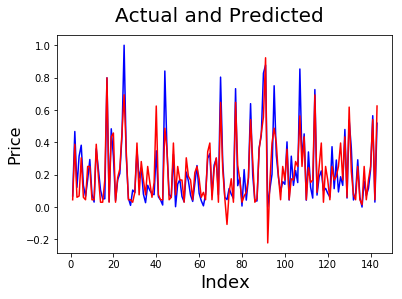

In [641]:
#Actual vs Predicted
c = [i for i in range(1,len(y_train_predicted)+1,1)]
fig = plt.figure()
plt.plot(c,y_train, color="blue", linewidth=1.5, linestyle="-")
plt.plot(c,y_train_predicted, color="red",  linewidth=1.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Price', fontsize=16)  

### Error Terms on train set

Text(0, 0.5, 'Price-Predicted_Price')

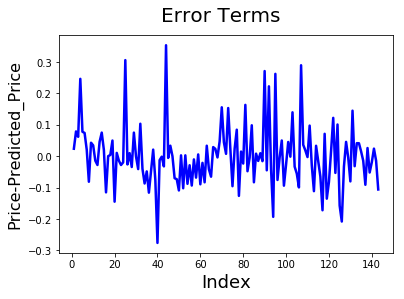

In [642]:
# Error terms
c = [i for i in range(1,len(y_train_predicted)+1,1)]
fig = plt.figure()
plt.plot(c,y_train-y_train_predicted, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Price-Predicted_Price', fontsize=16)                # Y-label

## Residual Analysis on train set

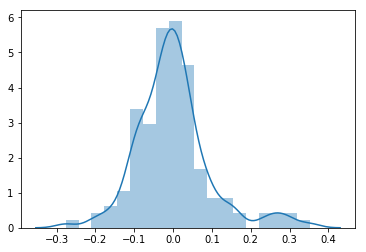

In [643]:
#Calculate errors
res = y_train-y_train_predicted
sns.distplot(res)

## Predictions and evaluation on the test set

In [644]:
X_test_sm = sm.add_constant(X_test[var_chosen])
#X_test_sm = X_test_sm[['horsepower', 'rwd', 'ohc']]
y_test_pred = lr_s.predict(X_test_sm)
X_test.head()

,car_ID,symboling,fueltype,aspiration,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,mfi,mpfi,spdi,spfi,five,four,six,three,twelve,two
160,161,0,0,0,0,0.265306,0.341732,0.200000,0.346154,0.132148,...,0,0,0,0,0,1,0,0,0,0
186,187,2,0,0,0,0.311953,0.426772,0.315789,0.605769,0.219125,...,0,1,0,0,0,1,0,0,0,0
59,60,1,0,0,0,0.355685,0.522835,0.421053,0.413462,0.271985,...,0,0,0,0,0,1,0,0,0,0
165,166,1,0,0,0,0.230321,0.379528,0.157895,0.307692,0.214320,...,0,1,0,0,0,1,0,0,0,0
140,141,2,0,0,0,0.195335,0.200000,0.136842,0.605769,0.202307,...,0,0,0,0,0,1,0,0,0,0


### R2_score on test set as asked in problem statement

In [648]:
from sklearn.metrics import r2_score
r2_score(y_test,y_test_pred)

0.6874760734804758

### Residual Analysis on test set

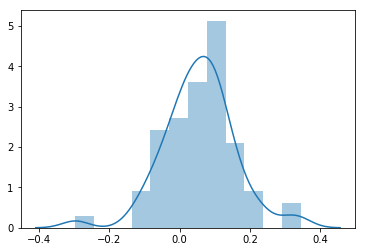

In [646]:
#Residual analyis on test set
res = y_test-y_test_pred
sns.distplot(res)

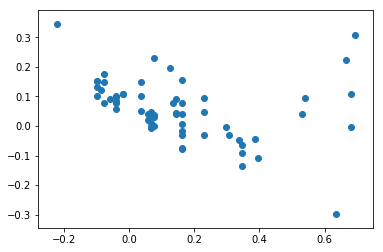

In [647]:
#Residuals vs y_test_pred
plt.scatter(y_test_pred, res)
plt.show()

## Conclusion of Multiple Linear Regression

## Below predictors have significant effect on the price variable
### - enginelocation	    - co-oefficient = 0.6621
### - carwidth		            - co-oefficient = 0.9146
### - bmw	                     - co-oefficient = 0.3363